In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

C:\Users\Mahtab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_excel('neurocontroller_model.xlsx', dtype=np.float32)

In [3]:
df.head(5)

,mass_flow(kg/h),Energy_ref,Torque_ref,screw_speed(rpm),solid_content(%),Energy(kJ/kg),Torque(N.m),∆𝒏,∆𝑐_𝑚
0,2.28,6552.149414,2.972,800.0,70.0,6552.149414,2.972000,0.0,0.0
1,2.28,6552.149414,2.972,1000.0,70.0,9031.174805,3.277172,-200.0,0.0
2,2.28,6552.149414,2.972,1200.0,70.0,8612.666016,2.604422,-400.0,0.0
3,2.28,6552.149414,2.972,800.0,72.5,7118.958984,3.229100,0.0,-2.5
4,2.28,6552.149414,2.972,1000.0,72.5,9297.460938,3.373800,-200.0,-2.5


In [4]:
#define inputs and outputs
df = df.sample(frac=1)
X1_data = df[['mass_flow(kg/h)','Energy_ref','Torque_ref','Energy(kJ/kg)','Torque(N.m)']]
Y1_data = df[['∆𝑐_𝑚']]                    

X_data = X1_data.values
Y_data= Y1_data.values
# normalize data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)
    

# SKLearnModel

In [6]:
model_cm_Neurocontroller= GradientBoostingRegressor(n_estimators =2000 , learning_rate = 0.3,max_depth=2)
cm_Neurocontroller = cross_validate(model_cm_Neurocontroller,X_data,Y_data.reshape(-1,),cv=10,scoring=('neg_mean_absolute_error'),return_train_score=True)

In [7]:
cm_Neurocontroller

{'fit_time': array([1.40819955, 1.32149434, 1.36634469, 1.28159547, 1.46208882,
        1.68785357, 1.38626122, 1.32046604, 1.24264526, 1.30849409]),
 'score_time': array([0.0049963 , 0.00396037, 0.00398922, 0.00396371, 0.00498867,
        0.00300694, 0.00398874, 0.00296164, 0.0029912 , 0.0039947 ]),
 'test_score': array([-0.19131774, -0.10476852, -0.0928972 , -0.09847763, -0.12542037,
        -0.08151929, -0.09930868, -0.07947877, -0.08891642, -0.05921162]),
 'train_score': array([-0.0840071 , -0.05676441, -0.05207821, -0.03916913, -0.04819717,
        -0.04850699, -0.04171057, -0.03884691, -0.05276767, -0.03361761])}

In [8]:
print("test scores:\n",list(map(abs,cm_Neurocontroller["test_score"])))
print("mean:  ",abs(np.mean(cm_Neurocontroller["test_score"])) )
print("\n\n")
print("train scores:\n",list(map(abs,cm_Neurocontroller["train_score"])))
print("mean:  ",abs(np.mean(cm_Neurocontroller["train_score"]) ))


test scores:
 [0.19131774044378655, 0.10476851649408868, 0.09289720260423463, 0.09847763086529959, 0.12542036839357032, 0.08151929401570006, 0.09930867524752147, 0.07947876874387283, 0.08891641649401699, 0.05921162281597615]
mean:   0.10213162361180675



train scores:
 [0.08400709839711529, 0.056764413156579346, 0.0520782140227721, 0.039169131807097246, 0.048197170272345664, 0.04850698543104792, 0.041710570365575704, 0.03884690769370225, 0.05276766857599779, 0.03361760784801124]
mean:   0.04956657675702446


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.01)
model_cm_Neurocontroller= GradientBoostingRegressor( learning_rate=0.2, max_depth=3, n_estimators=200)
model_cm_Neurocontroller.fit(X_train,y_train)
y_pred=model_cm_Neurocontroller.predict(X_test)

C:\Users\Mahtab\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [13]:
from joblib import dump, load
dump(model_cm_Neurocontroller,'model_cm_Neurocontroller.h5') 

['model_cm_Neurocontroller.h5']

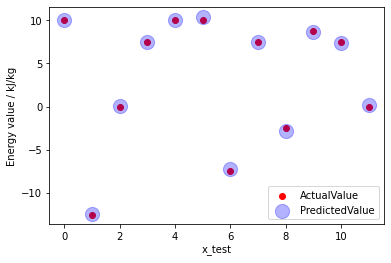

In [10]:
#plots
plt.scatter(list(range(len(y_pred))),y_test, c= ('red'))
plt.scatter(list(range(len(y_pred))),y_pred, c= ('blue'),alpha=0.3,s=200)
plt.xlabel('x_test')
plt.ylabel('Energy value / kJ/kg')
plt.legend(['ActualValue', 'PredictedValue'])
plt.show()